# Exploring 911 Calls Dataset

A 911 emergency is when someone needs help right away usually because of an injury or an immediate danger. For example, 911 would be called if there's a fire, someone's life is in danger, you see a crime happening, or you are in or see a serious traffic accident.

### 1. Problem Definition
Explore the dataset and see if some useful information can be extracted from it.

### 2. Data
[Kaggle](https://www.kaggle.com/mchirico/montcoalert)
* 911.csv: 9 columns and 99492 rows

### 3. Evaluation
-

### 4. Features
* lat : Latitude
* lng: Longitude
* desc: Description of the Emergency Call
* zip: Zipcode
* title: Title
* timeStamp: YYYY-MM-DD HH:MM:SS
* twp: Township
* addr: Address
* e: Dummy variable (always 1)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('whitegrid')
sns.set_palette('viridis')

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/jafar-shodiq/mlearning-proj/main/project/exploring-911-calls/911.csv')
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


**Reasons for 911 calls**

Top 10 reasons to call 911

In [8]:
df['title'].value_counts().head(10)

Traffic: VEHICLE ACCIDENT -    23066
Traffic: DISABLED VEHICLE -     7702
Fire: FIRE ALARM                5496
EMS: RESPIRATORY EMERGENCY      5112
EMS: CARDIAC EMERGENCY          5012
EMS: FALL VICTIM                4863
EMS: VEHICLE ACCIDENT           3935
Traffic: ROAD OBSTRUCTION -     3144
EMS: SUBJECT IN PAIN            2687
EMS: HEAD INJURY                2631
Name: title, dtype: int64

How many unique reasons are there?

In [9]:
df['title'].nunique()

110

Split the general reasons (EMS/Fire/Traffic) from the `title` column into a new column called `reason`

In [10]:
df['reason'] = df['title'].apply(lambda x: x.split(':')[0])
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS


Let's check the value counts for each reasons

In [11]:
df['reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: reason, dtype: int64

Text(0.5, 1.0, 'Reason for 911 Call')

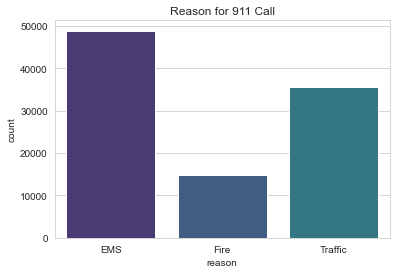

In [37]:
sns.countplot(x='reason', data=df)
plt.title('Reason for 911 Call')

**Dealing with Datetime Type**

In [14]:
type(df['timeStamp'].loc[0])

str

the `timeStamp` are still strings. Convert the column to DateTime objects

In [16]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])
df['timeStamp'].head()

0   2015-12-10 17:40:00
1   2015-12-10 17:40:00
2   2015-12-10 17:40:00
3   2015-12-10 17:40:01
4   2015-12-10 17:40:01
Name: timeStamp, dtype: datetime64[ns]

From this datetime object, features like year, month, day, dayofweek, and hour can be extracted.

In [17]:
df['hour'] = df['timeStamp'].apply(lambda x: x.hour)
df['month'] = df['timeStamp'].apply(lambda x: x.month)
df['dayofweek'] = df['timeStamp'].apply(lambda x: x.dayofweek)

df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hour,month,dayofweek
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,3
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,3
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,3


Notice how the day of week is an integer 0-6. Map the actual string names with a dictionary

In [19]:
dmap = {0:'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'}
df['dayofweek'] = df['dayofweek'].map(dmap)

df['dayofweek'].head()

0    Thu
1    Thu
2    Thu
3    Thu
4    Thu
Name: dayofweek, dtype: object

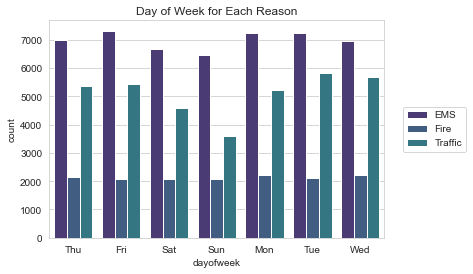

In [38]:
sns.countplot(x='dayofweek', data=df, hue='reason')
plt.title('Day of Week for Each Reason')
plt.legend(loc='center', bbox_to_anchor=(1.15, 0.5, 0, 0))

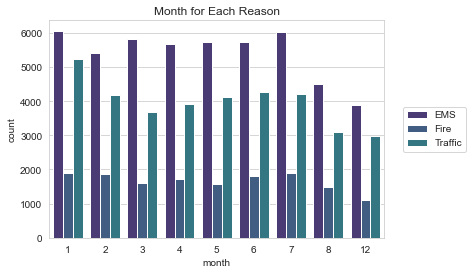

In [39]:
sns.countplot(x='month', data=df, hue='reason')
plt.title('Month for Each Reason')
plt.legend(loc='center', bbox_to_anchor=(1.15, 0.5, 0, 0))

**Missing Months**

In [23]:
df['month'].value_counts()

1     13205
7     12137
6     11786
2     11467
5     11423
4     11326
3     11101
8      9078
12     7969
Name: month, dtype: int64

Notice that it was missing some months. Maybe this information can be retrieved by plotting in another way, possibly a simple line plot that fills in the missing months.

Create a groupby object by the `month` column and use count() for aggregation.

In [24]:
byMonth = df.groupby('month').count()
byMonth

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hour,dayofweek
month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423
6,11786,11786,11786,10212,11786,11786,11777,11732,11786,11786,11786,11786
7,12137,12137,12137,10633,12137,12137,12133,12088,12137,12137,12137,12137
8,9078,9078,9078,7832,9078,9078,9073,9025,9078,9078,9078,9078
12,7969,7969,7969,6907,7969,7969,7963,7916,7969,7969,7969,7969


Text(0.5, 1.0, 'Number of Calls Per Month')

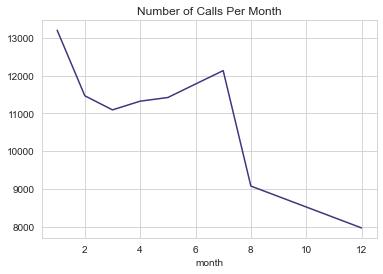

In [42]:
byMonth['twp'].plot()
plt.title('Number of Calls Per Month')

Create a linear fit on the number of calls per month.

<AxesSubplot:title={'center':'Number of Calls Per Month'}, xlabel='month', ylabel='twp'>

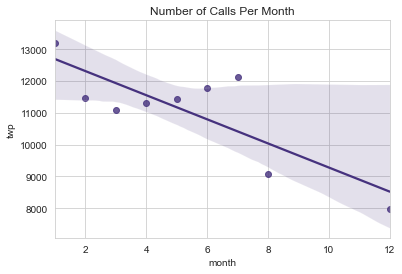

In [45]:
plt.title('Number of Calls Per Month')
sns.regplot(x='month', y='twp', data=byMonth.reset_index())

Create a new column called `date` that contains the date from the `timeStamp` column. 

In [29]:
df['date'] = df['timeStamp'].apply(lambda x: x.date())
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hour,month,dayofweek,date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thu,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thu,2015-12-10


Now groupby this `date` column with the count() aggregate.

In [31]:
byDate = df.groupby('date').count()
byDate.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hour,month,dayofweek
date,,,,,,,,,,,,,
2015-12-10,115,115,115,100,115,115,115,113,115,115,115,115,115
2015-12-11,396,396,396,333,396,396,395,391,396,396,396,396,396
2015-12-12,403,403,403,333,403,403,403,401,403,403,403,403,403
2015-12-13,319,319,319,280,319,319,319,317,319,319,319,319,319
2015-12-14,447,447,447,387,447,447,446,445,447,447,447,447,447


Text(0.5, 1.0, 'Number of Calls Between 2015-12 And 2016-09')

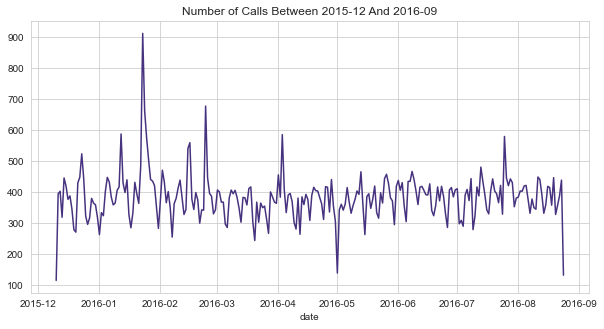

In [47]:
byDate['twp'].plot(figsize=(10, 5))
plt.title('Number of Calls Between 2015-12 And 2016-09')

Recreate with 3 separate plots with each plot representing a reason for the 911 call

Text(0.5, 1.0, 'Traffic Calls Between 2015-12 And 2016-09')

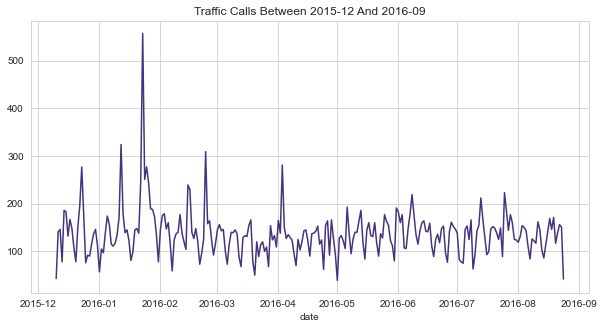

In [48]:
df[df['reason']=='Traffic'].groupby('date').count()['twp'].plot(figsize=(10, 5))
plt.title('Traffic Calls Between 2015-12 And 2016-09')

Text(0.5, 1.0, 'Fire Calls Between 2015-12 And 2016-09')

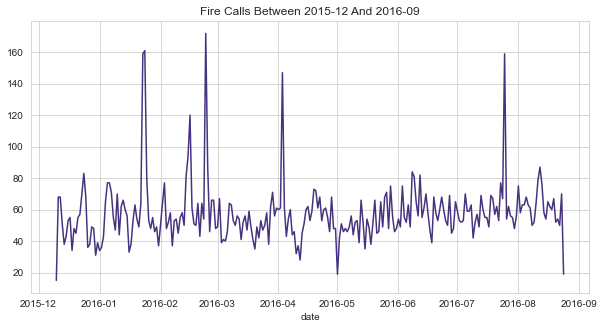

In [49]:
df[df['reason']=='Fire'].groupby('date').count()['twp'].plot(figsize=(10, 5))
plt.title('Fire Calls Between 2015-12 And 2016-09')

Text(0.5, 1.0, 'EMS Calls Between 2015-12 And 2016-09')

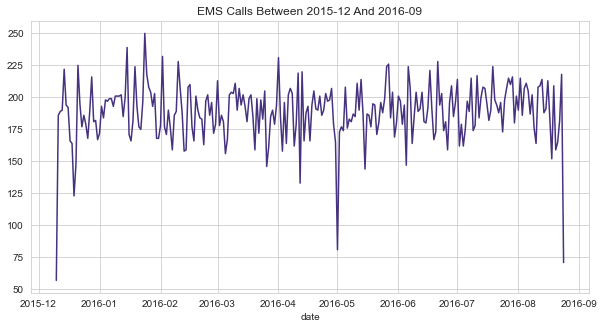

In [50]:
df[df['reason']=='EMS'].groupby('date').count()['twp'].plot(figsize=(10, 5))
plt.title('EMS Calls Between 2015-12 And 2016-09')

**Creating Heatmaps**

Moving on, next is creating heatmaps. First, restucture the dataframe so that the columns becomes the `hour` and the index becomes the `dayofweek`

In [51]:
dayHour = df.groupby(['dayofweek', 'hour']).count()['reason'].unstack()
dayHour.T

dayofweek,Fri,Mon,Sat,Sun,Thu,Tue,Wed
hour,,,,,,,
0,275,282,375,383,278,269,250
1,235,221,301,306,202,240,216
2,191,201,263,286,233,186,189
3,175,194,260,268,159,170,209
4,201,204,224,242,182,209,156
5,194,267,231,240,203,239,255
6,372,397,257,300,362,415,410
7,598,653,391,402,570,655,701
8,742,819,459,483,777,889,875


Text(0.5, 1.0, 'Number of Reasons for 911 Calls Per Hour and Day of Week')

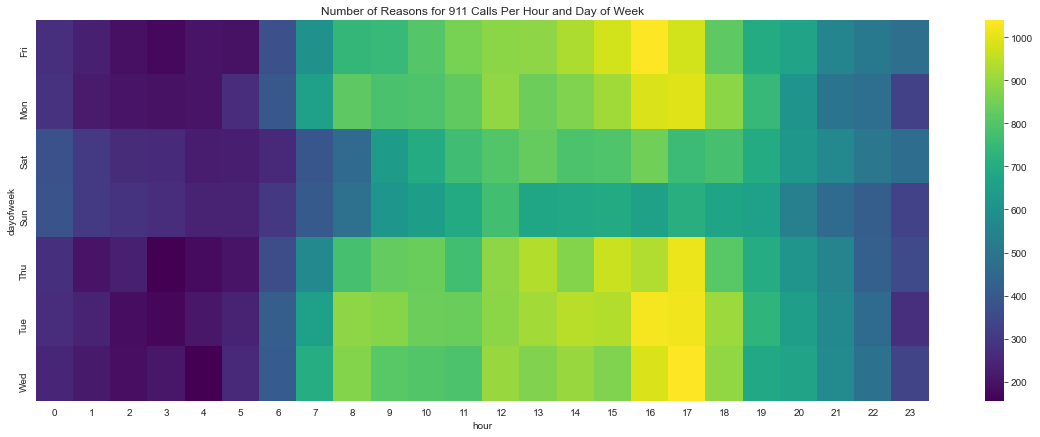

In [61]:
plt.figure(figsize=(20, 7))
sns.heatmap(data=dayHour, cmap='viridis')
plt.title('Number of Reasons for 911 Calls Per Hour and Day of Week')

Text(0.5, 1.0, 'Number of Reasons for 911 Calls Per Hour and Day of Week')

<Figure size 1440x504 with 0 Axes>

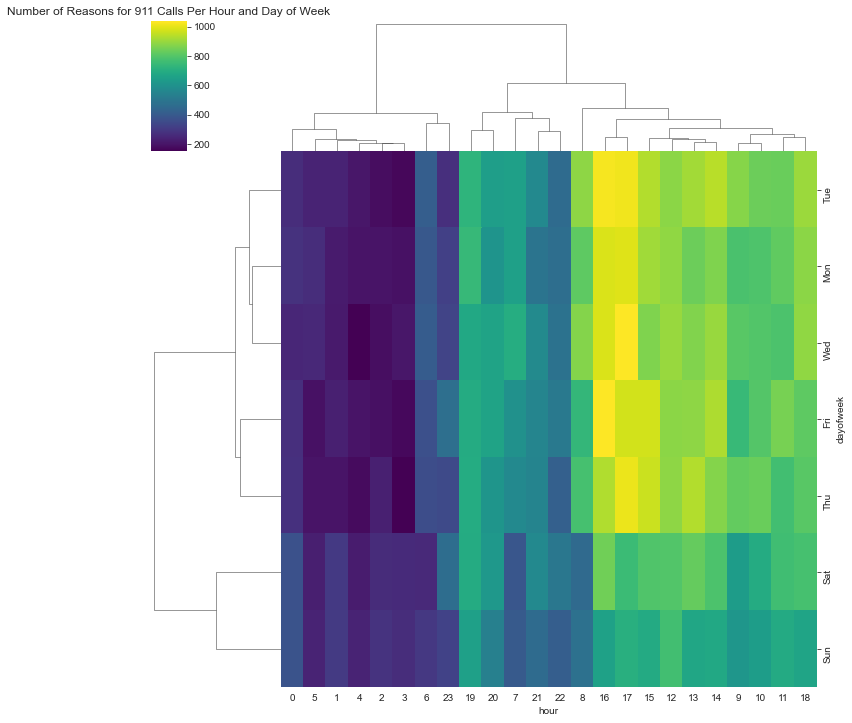

In [60]:
plt.figure(figsize=(20, 7))
sns.clustermap(data=dayHour, cmap='viridis')
plt.title('Number of Reasons for 911 Calls Per Hour and Day of Week')

Do the same for `month`

In [58]:
dayMonth = df.groupby(['dayofweek', 'month']).count()['reason'].unstack()
dayMonth

month,1,2,3,4,5,6,7,8,12
dayofweek,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266
Tue,1973,1753,1884,1430,1918,1676,1670,1612,1234
Wed,1700,1903,1889,1517,1538,2058,1717,1295,1262


Text(0.5, 1.0, 'Number of Reasons for 911 Calls Per Month and  Day of Week')

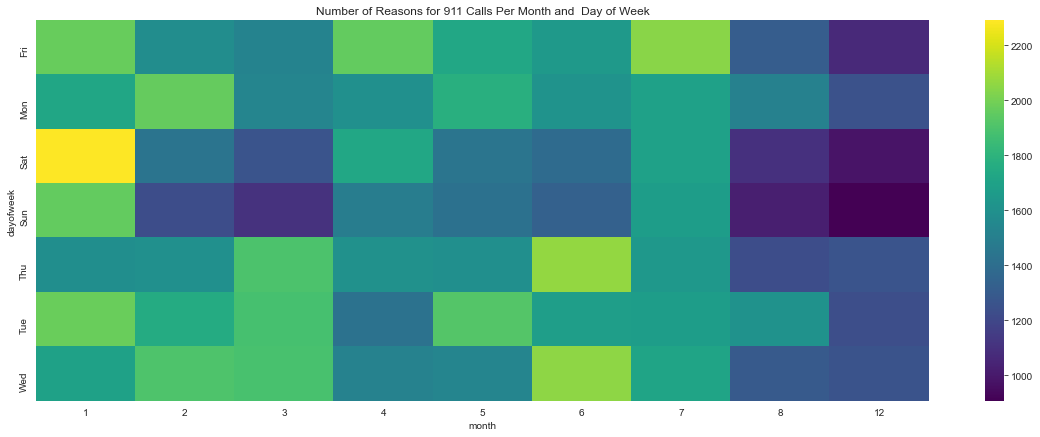

In [63]:
plt.figure(figsize=(20, 7))
sns.heatmap(data=dayMonth, cmap='viridis')
plt.title('Number of Reasons for 911 Calls Per Month and  Day of Week')

Text(0.5, 1.0, 'Number of Reasons for 911 Calls Per Month and  Day of Week')

<Figure size 1440x504 with 0 Axes>

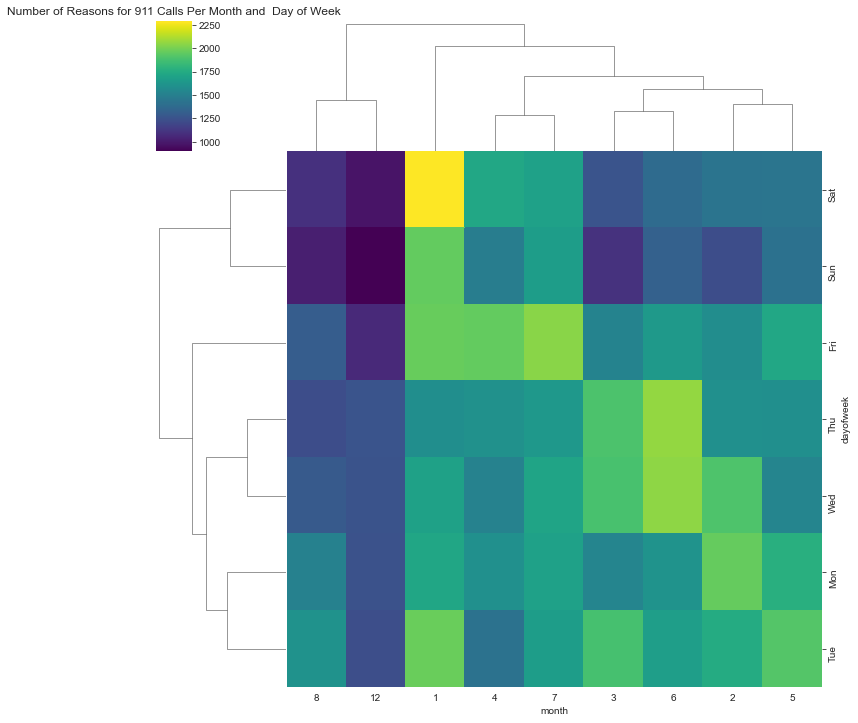

In [64]:
plt.figure(figsize=(20, 7))
sns.clustermap(data=dayMonth, cmap='viridis')
plt.title('Number of Reasons for 911 Calls Per Month and  Day of Week')